# Visualización

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mtimg
import seaborn as sns
import json
import statistics 

In [4]:
stay = pd.read_csv('./data/madrid_stay.csv', encoding = 'utf-8-sig')
stay.head(10)

,Unnamed: 0,id,host_id,host_name,room_type,disctricts,neighbourhoods,price,number_of_reviews,latitude,longitude
0,0,6369,13660,Simon,Private room,Chamartín,Hispanoamérica,70,65,40.45628,-3.67763
1,1,21853,83531,Abdel,Private room,Latina,Cármenes,17,33,40.40341,-3.74084
2,2,24805,101471,Iraido,Entire home/apt,Centro,Universidad,80,2,40.42202,-3.70395
3,3,24836,101653,Tenty,Entire home/apt,Centro,Justicia,115,64,40.41995,-3.69764
4,4,26825,114340,Agustina,Private room,Arganzuela,Legazpi,25,136,40.38985,-3.69011
5,5,30320,130907,Dana,Entire home/apt,Centro,Sol,65,168,40.41552,-3.70346
6,6,30959,132883,Angela,Entire home/apt,Centro,Embajadores,54,8,40.41111,-3.70269
7,7,40916,130907,Dana,Entire home/apt,Centro,Universidad,90,38,40.42096,-3.70428
8,8,59923,288380,Patricia,Private room,Centro,Palacio,40,14,40.41971,-3.71256
9,9,62423,303845,Arturo,Private room,Centro,Justicia,45,57,40.42080,-3.69878


In [5]:
stay.columns

Index(['Unnamed: 0', 'id', 'host_id', 'host_name', 'room_type', 'disctricts',
       'neighbourhoods', 'price', 'number_of_reviews', 'latitude',
       'longitude'],
      dtype='object')

In [6]:
stay=stay.drop(columns=['Unnamed: 0'])
stay.head()

,id,host_id,host_name,room_type,disctricts,neighbourhoods,price,number_of_reviews,latitude,longitude
0,6369,13660,Simon,Private room,Chamartín,Hispanoamérica,70,65,40.45628,-3.67763
1,21853,83531,Abdel,Private room,Latina,Cármenes,17,33,40.40341,-3.74084
2,24805,101471,Iraido,Entire home/apt,Centro,Universidad,80,2,40.42202,-3.70395
3,24836,101653,Tenty,Entire home/apt,Centro,Justicia,115,64,40.41995,-3.69764
4,26825,114340,Agustina,Private room,Arganzuela,Legazpi,25,136,40.38985,-3.69011


In [7]:
stay.dtypes

id                     int64
host_id                int64
host_name             object
room_type             object
disctricts            object
neighbourhoods        object
price                  int64
number_of_reviews      int64
latitude             float64
longitude            float64
dtype: object

In [8]:
stay.price.unique()

array([  70,   17,   80,  115,   25,   65,   54,   90,   40,   45,   75,
        110,   85,   63,  102,   60,  100,   50,   32,   20,  194,   95,
         57,   35,   29,   67,  200,   26,   21,   69,  150,   19,   30,
         89,   77,  140,   55,  145,   98,   83,   74,   28,   66,  480,
         72,   59,  169,   58,   43,   68,  155,  116,   24,   82,   22,
         79,   81,  130,  135,   52,   49,  105,   88,   56,   48,   38,
        120,  112,  350,  190,   97,   84,   39,   34,  300,   23,   99,
         33,   78,  165,   37,  250,  197,   16,  125,  149,  210,  108,
         73,  205,   42,  104,   27,   61,  220,   87,  129,   12,   96,
         62,  107,   31,   64,  221,  132,   94,  185,  198,   44,   18,
         46,  101,  148,   76,  230,   15,  510,  118,   53,   91,   51,
       1000,   36,  153,   41,  270,  160,   13,  400,  121,  315,   71,
        139,   47,  204,  481,  199,  375,  137,  175,  109,  542,  106,
        260,  170,  159,  225,   92,  103,   86,   

In [9]:
stay['price_ranges'] = pd.cut(stay.price, bins=[0, 50, 100, 150, 200, 300, 500, 10000])
stay

,id,host_id,host_name,room_type,disctricts,neighbourhoods,price,number_of_reviews,latitude,longitude,price_ranges
0,6369,13660,Simon,Private room,Chamartín,Hispanoamérica,70,65,40.45628,-3.67763,"(50, 100]"
1,21853,83531,Abdel,Private room,Latina,Cármenes,17,33,40.40341,-3.74084,"(0, 50]"
2,24805,101471,Iraido,Entire home/apt,Centro,Universidad,80,2,40.42202,-3.70395,"(50, 100]"
3,24836,101653,Tenty,Entire home/apt,Centro,Justicia,115,64,40.41995,-3.69764,"(100, 150]"
4,26825,114340,Agustina,Private room,Arganzuela,Legazpi,25,136,40.38985,-3.69011,"(0, 50]"
...,...,...,...,...,...,...,...,...,...,...,...
20832,38725567,226958922,CristÃ³bal,Entire home/apt,Chamartín,Castilla,100,0,40.47847,-3.68395,"(50, 100]"
20833,38726351,178608863,Rostyslav,Private room,Puente de Vallecas,Palomeras Sureste,24,0,40.38533,-3.63968,"(0, 50]"
20834,38727654,182062359,Jose Maciel,Entire home/apt,Centro,Universidad,75,0,40.42182,-3.70336,"(50, 100]"
20835,38728727,31425029,Valeska,Entire home/apt,Centro,Embajadores,45,0,40.40896,-3.70107,"(0, 50]"


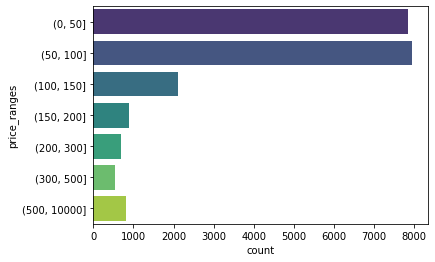

In [11]:
priceranges = sns.countplot(y=stay.price_ranges, palette="viridis")
priceranges.figure.savefig('imgs/precios.png')

In [17]:
stay.describe()

,id,host_id,price,number_of_reviews,latitude,longitude
count,2.083700e+04,2.083700e+04,20837.000000,20837.000000,20837.000000,20837.000000
mean,2.356026e+07,1.014144e+08,134.065364,35.163891,40.420548,-3.694500
std,1.083667e+07,8.956078e+07,381.207575,61.863053,0.021881,0.027793
min,6.369000e+03,5.154000e+03,8.000000,0.000000,40.319480,-3.890940
25%,1.608985e+07,2.232182e+07,40.000000,1.000000,40.409550,-3.707490
50%,2.459474e+07,7.574288e+07,65.000000,8.000000,40.418900,-3.701180
75%,3.401318e+07,1.719263e+08,100.000000,42.000000,40.429020,-3.689110
max,3.873002e+07,2.960847e+08,9999.000000,594.000000,40.573990,-3.527660


In [20]:
avg = round(stay['price'].mean())
avg

134

In [21]:
median = round(stay['price'].median())
median

65

<AxesSubplot:xlabel='price'>

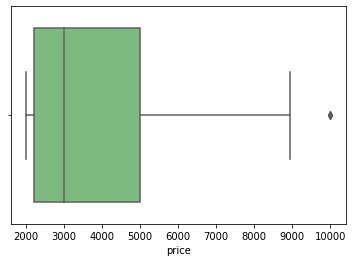

In [23]:
avgg = sns.boxplot(x=stay["price"].nlargest(100), data=stay, palette ="Greens")
avgg

In [25]:
round(stay["price"].nlargest(100).describe())

count     100.0
mean     4230.0
std      2529.0
min      1999.0
25%      2200.0
50%      3000.0
75%      5000.0
max      9999.0
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

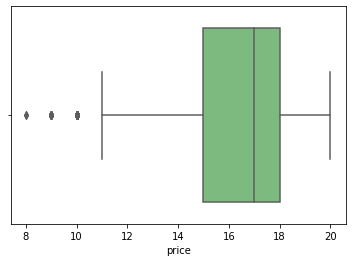

In [26]:
avgh = sns.boxplot(x=stay["price"].nsmallest(1000), data=stay, palette ="Greens")
avgh

In [28]:
round(stay["price"].nsmallest(1000).describe())

count    1000.0
mean       16.0
std         3.0
min         8.0
25%        15.0
50%        17.0
75%        18.0
max        20.0
Name: price, dtype: float64

In [29]:
most_exp = round(stay['price'].max())
most_exp

9999

In [31]:
stay.loc[stay["price"]== 9999]

,id,host_id,host_name,room_type,disctricts,neighbourhoods,price,number_of_reviews,latitude,longitude,price_ranges
11799,27417973,189959417,Adrian,Private room,Centro,Justicia,9999,1,40.42661,-3.70051,"(500, 10000]"
11801,27418553,189959417,Adrian,Private room,Centro,Justicia,9999,0,40.42521,-3.70041,"(500, 10000]"
11804,27418907,189959417,Adrian,Private room,Centro,Justicia,9999,1,40.42449,-3.69903,"(500, 10000]"
16853,34851930,106745942,Alaia,Entire home/apt,Centro,Justicia,9999,2,40.42555,-3.70020,"(500, 10000]"


In [32]:
cheap = round(stay['price'].min())
cheap

8

In [33]:
stay.loc[stay["price"]== 8]

,id,host_id,host_name,room_type,disctricts,neighbourhoods,price,number_of_reviews,latitude,longitude,price_ranges
6344,18351752,69998776,JosÃ©,Private room,Ciudad Lineal,Pueblo Nuevo,8,2,40.42576,-3.63870,"(0, 50]"
7757,20049665,68664241,Luis Carlos,Private room,Arganzuela,Chopera,8,0,40.39622,-3.69926,"(0, 50]"


In [34]:
stay['disctricts'].value_counts()

Centro                   9773
Salamanca                1375
Chamberí                 1331
Arganzuela               1121
Tetuán                    838
Carabanchel               678
Retiro                    665
Latina                    616
Ciudad Lineal             613
Puente de Vallecas        591
Chamartín                 551
Moncloa - Aravaca         542
San Blas - Canillejas     524
Usera                     361
Hortaleza                 332
Fuencarral - El Pardo     300
Villaverde                166
Barajas                   165
Moratalaz                 127
Villa de Vallecas         103
Vicálvaro                  65
Name: disctricts, dtype: int64

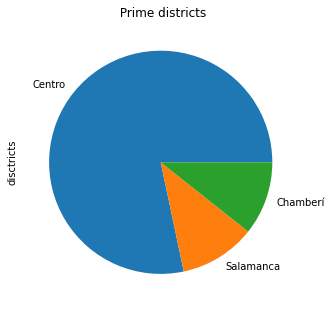

In [36]:
prime_dist = stay["disctricts"].value_counts().nlargest(3).plot.pie(figsize = (5,10), title = " Prime districts")
prime_dist.figure.savefig('imgs/top3d.png')

<AxesSubplot:>

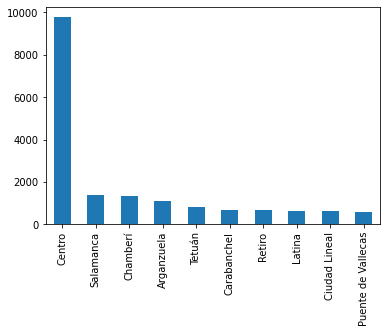

In [37]:
stay["disctricts"].value_counts().nlargest(10).plot.bar()